In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
train_data = pd.read_csv('F:\prodigy\ProdigyInfoTech_ML\PRODIGY_ML_01/train.csv')
test_data = pd.read_csv('F:\prodigy\ProdigyInfoTech_ML\PRODIGY_ML_01/test.csv')

# Combine train and test data for preprocessing
all_data = pd.concat([train_data, test_data], ignore_index=True)  # Reset index to avoid duplication

# Select the relevant features and target variable
numerical_features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
target = 'SalePrice'

In [4]:
# Fill missing values with median for numerical features
all_data[numerical_features] = all_data[numerical_features].fillna(all_data[numerical_features].median())

# Extract the features and target variable
X = all_data[numerical_features]


In [5]:

# Restore indices for splitting
train_idx = train_data.index
test_idx = test_data.index

# Split the data into training and testing sets
X_train = X.iloc[train_idx].copy()
X_test = X.iloc[test_idx].copy()
y_train = train_data[target]

# Standardize numerical features
scaler = StandardScaler()
X_train.loc[:, numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])


C:\Users\Nimra Waqar\AppData\Local\Temp\ipykernel_12988\2991537155.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.37033344 -0.48251191  0.51501256 ...  1.56964722 -0.83278768
 -0.49393395]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_features] = scaler.fit_transform(X_train[numerical_features])
C:\Users\Nimra Waqar\AppData\Local\Temp\ipykernel_12988\2991537155.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.16377912  0.16377912  0.16377912 ...  1.39002276 -1.06246453
  0.16377912]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_features] = scaler.fit_transform(X_train[numerical_features])
C:\Users\Nimra Waqar\AppData\Local\Temp\ipykernel_12988\2991537155.py:12: FutureWarning: Setting an item

Predictions on the test set:
[211526.41442353 162218.7610017  219891.10562902 ... 251478.82110238
 253005.96982446 140132.04717922]


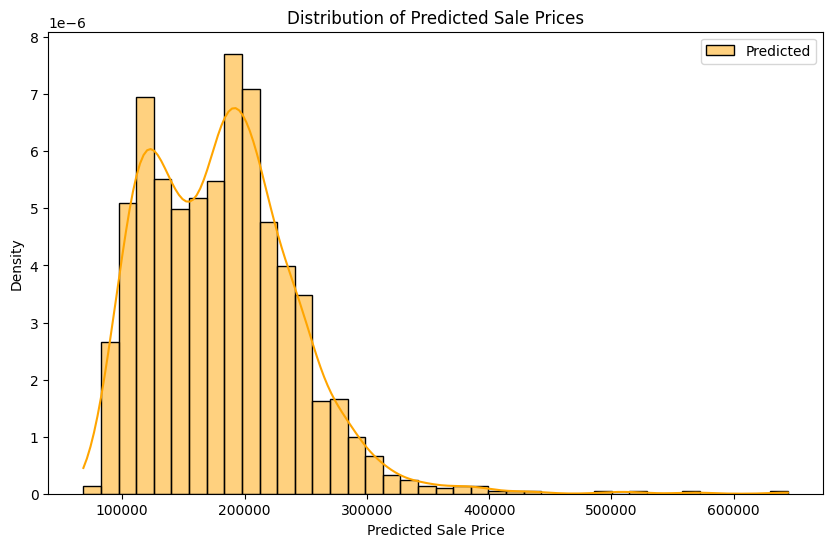

In [6]:

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Visualization and Evaluation
if target in test_data.columns:
    y_test = test_data[target]
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Scatter plot of actual vs. predicted prices
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel('Actual Sale Price')
    plt.ylabel('Predicted Sale Price')
    plt.title('Actual vs Predicted Sale Price')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line of perfect prediction
    plt.show()

    # Distribution plot of actual vs. predicted prices
    plt.figure(figsize=(10, 6))
    sns.histplot(y_test, kde=True, color='blue', label='Actual', stat='density')
    sns.histplot(y_pred, kde=True, color='orange', label='Predicted', stat='density')
    plt.xlabel('Sale Price')
    plt.ylabel('Density')
    plt.title('Distribution of Actual and Predicted Sale Prices')
    plt.legend()
    plt.show()

    # Residual plot
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True, color='purple', stat='density')
    plt.xlabel('Residuals')
    plt.ylabel('Density')
    plt.title('Distribution of Residuals')
    plt.show()

    print(f'Mean Squared Error: {mse:.2f}')
    print(f'R-squared: {r2:.2f}')
else:
    print('Predictions on the test set:')
    print(y_pred)

    # Distribution plot of predicted prices
    plt.figure(figsize=(10, 6))
    sns.histplot(y_pred, kde=True, color='orange', label='Predicted', stat='density')
    plt.xlabel('Predicted Sale Price')
    plt.ylabel('Density')
    plt.title('Distribution of Predicted Sale Prices')
    plt.legend()
    plt.show()